In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
subjects = ['proband' + str(i) for i in range(1,16)]

## All data

только 3 активности - бег, стояние и ходьба

In [ ]:
base_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/run_walk_stand_notnormaliz.csv', index_col= 'id')
base_data["datetime"] = pd.to_datetime(base_data["datetime"])
base_data

,attr_x,attr_y,attr_z,Subject,Activity,Body_part,datetime
id,,,,,,,
1,-3.585916,9.165603,0.539892,proband1,running,head,2015-07-04 07:38:09.002
2,-3.438672,9.077616,0.606332,proband1,running,head,2015-07-04 07:38:09.021
3,-3.210625,8.965687,0.752976,proband1,running,head,2015-07-04 07:38:09.042
4,-3.034052,8.980651,0.857124,proband1,running,head,2015-07-04 07:38:09.062
5,-2.876035,9.050681,0.939126,proband1,running,head,2015-07-04 07:38:09.081
...,...,...,...,...,...,...,...
33788,-8.334216,5.079897,0.163404,proband15,running,head,2015-07-18 15:01:05.915
33789,-8.551490,4.990115,0.199317,proband15,running,head,2015-07-18 15:01:05.933
33790,-8.688558,4.890756,0.349553,proband15,running,head,2015-07-18 15:01:05.953


In [ ]:
base_data.Activity.value_counts()

running    3755947
walking    3398032
Name: Activity, dtype: int64

## Визуализация данных первого объекта

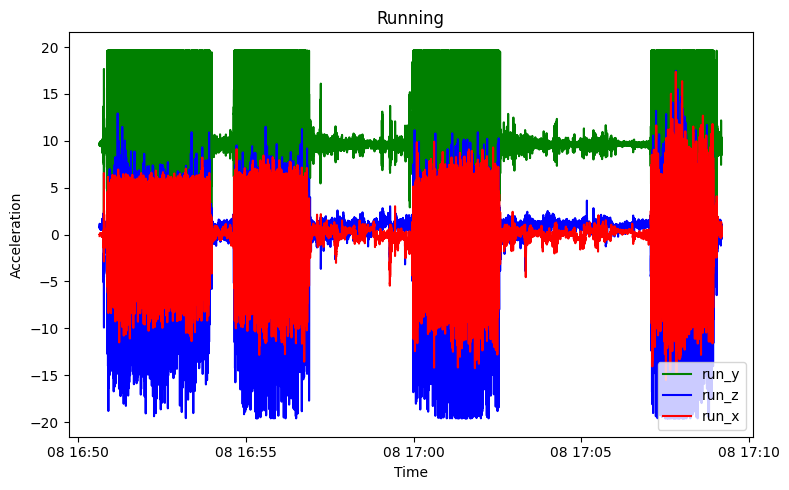

In [ ]:
subject = 'proband5'


subject_data = base_data[(base_data['Body_part']=='chest')&(base_data['Activity']=='running')&(base_data['Subject'] == subject)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))


axes.plot(subject_data["datetime"], subject_data['attr_y'], color='green', label='run_y')
axes.plot(subject_data["datetime"], subject_data['attr_z'], color='blue', label='run_z')
axes.plot(subject_data["datetime"], subject_data['attr_x'], color='red', label='run_x')


axes.legend(loc='lower right')
axes.set_xlabel('Time')
axes.set_ylabel('Acceleration')
axes.set_title(f'Running')

plt.tight_layout()
plt.show()

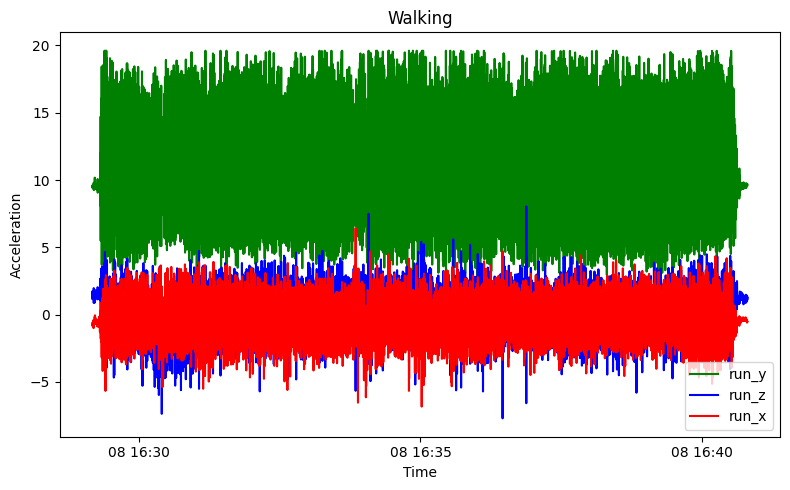

In [ ]:
subject = 'proband5'


subject_data = base_data[(base_data['Body_part']=='chest')&(base_data['Activity']=='walking')&(base_data['Subject'] == subject)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))


axes.plot(subject_data["datetime"], subject_data['attr_y'], color='green', label='run_y')
axes.plot(subject_data["datetime"], subject_data['attr_z'], color='blue', label='run_z')
axes.plot(subject_data["datetime"], subject_data['attr_x'], color='red', label='run_x')


axes.legend(loc='lower right')
axes.set_xlabel('Time')
axes.set_ylabel('Acceleration')
axes.set_title(f'Walking')

plt.tight_layout()
plt.show()

# **Усреднение данных/Сглаживание**








## Скользящая средняя

In [ ]:
def rollaverage(data, window_size, time):

  data = data.groupby('Subject').resample(time, on='datetime').mean()

  data['attr_x_avg'] = data.groupby('Subject')['attr_x'].rolling(window_size).mean().values
  data['attr_y_avg'] = data.groupby('Subject')['attr_y'].rolling(window_size).mean().values
  data['attr_z_avg'] = data.groupby('Subject')['attr_z'].rolling(window_size).mean().values

  data['attr_x_avg'].fillna(data['attr_x_avg'].mean(), inplace=True)
  data['attr_y_avg'].fillna(data['attr_y_avg'].mean(), inplace=True)
  data['attr_z_avg'].fillna(data['attr_z_avg'].mean(), inplace=True)

  return data

### Chest

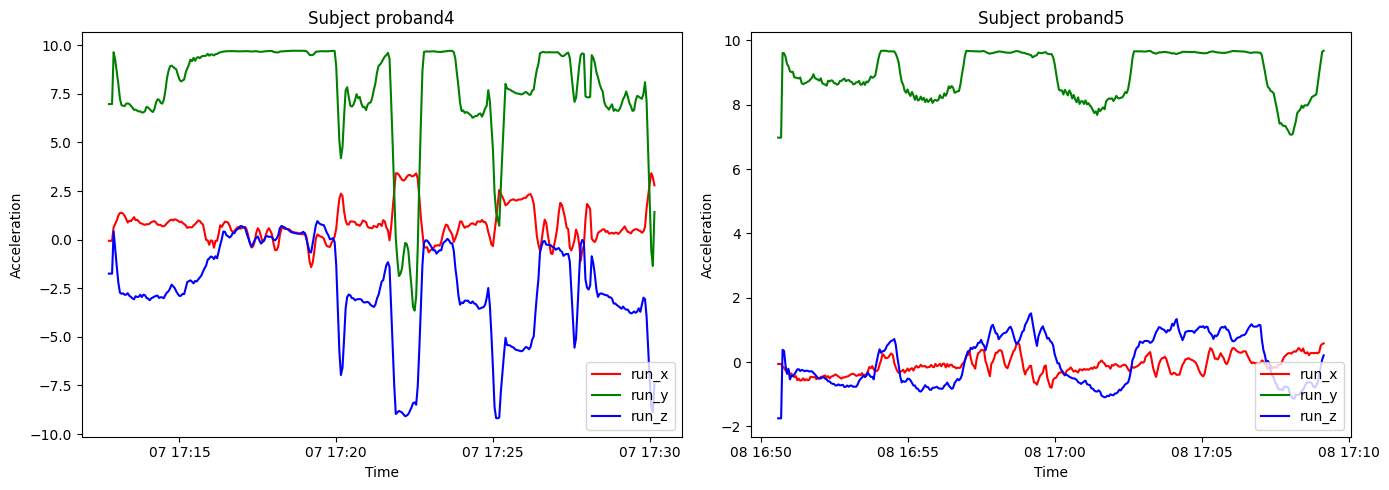

In [ ]:
data = base_data.copy(deep=True)

chest_run = data[(data['Body_part']=='chest')&(data['Activity']=='running')]
chest_run_roll = rollaverage(chest_run, 4, '3S')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes = axes.flatten()

for i, subject in enumerate(data['Subject'].unique()[3:5]):
    subject_data = chest_run_roll.loc[subject]
    # subject_data.index = range(len(subject_data.index))

    axes[i].plot(subject_data.index, subject_data['attr_x_avg'], color='red', label='run_x')
    axes[i].plot(subject_data.index, subject_data['attr_y_avg'], color='green', label='run_y')
    axes[i].plot(subject_data.index, subject_data['attr_z_avg'], color='blue', label='run_z')

    axes[i].legend(loc='lower right')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')
    axes[i].set_title(f'Subject {subject}')

plt.tight_layout()
plt.show()

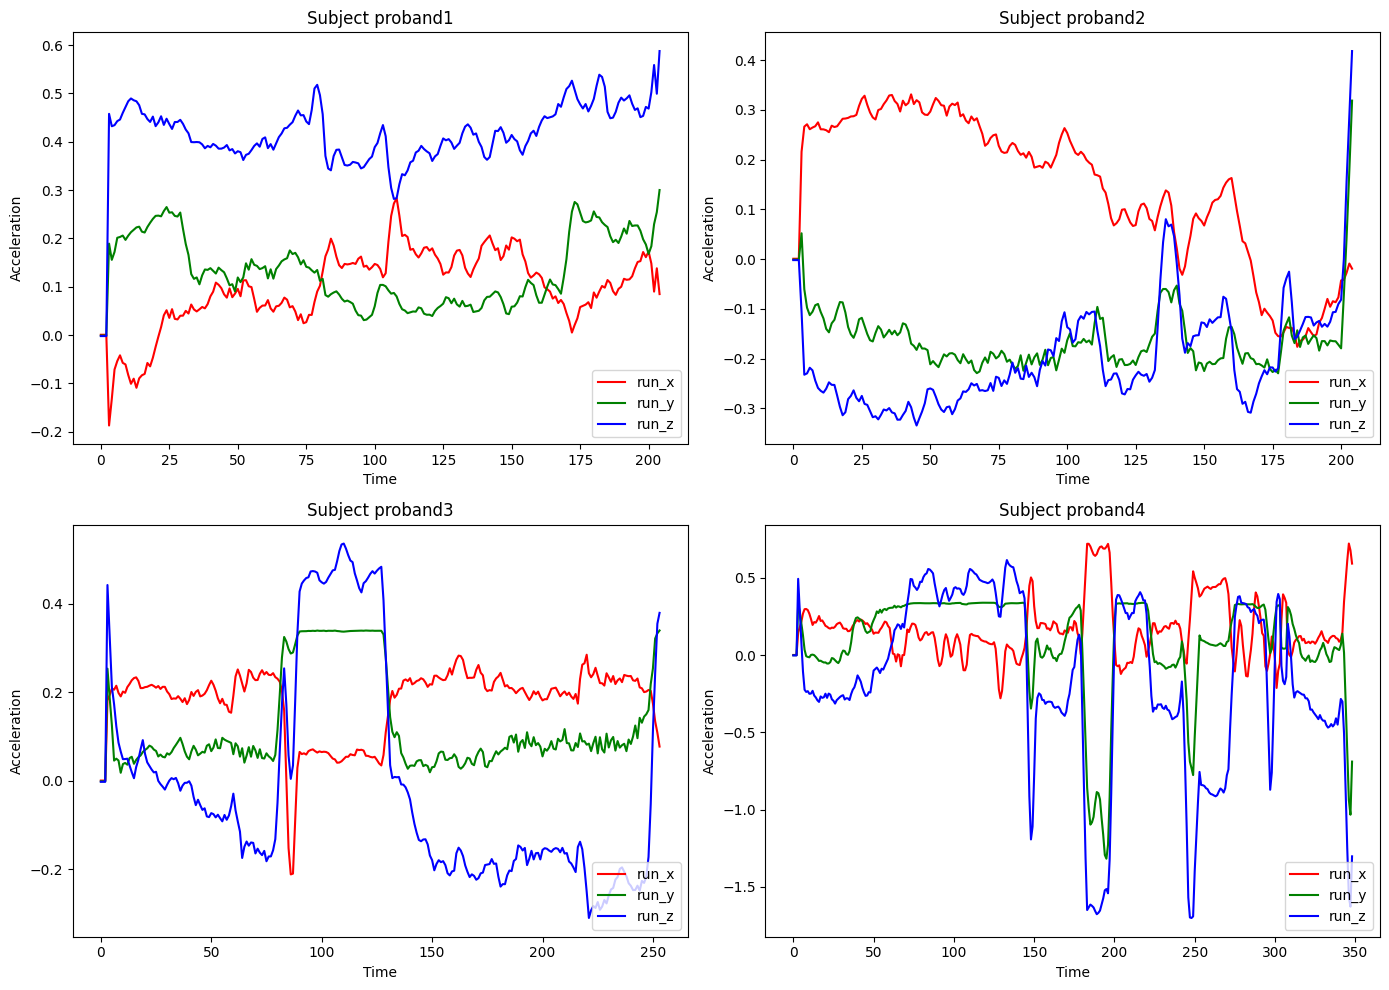

In [ ]:
from sklearn.preprocessing import StandardScaler

data2 = base_data.copy(deep=True)
chest_run2 = data2[(data2['Body_part']=='chest')&(data2['Activity']=='running')]


scaler = StandardScaler()
chest_run2[['attr_x','attr_y', 'attr_z']] = scaler.fit_transform(chest_run2[['attr_x','attr_y', 'attr_z']])


chest_run_roll2 = rollaverage(chest_run2, 4, '3S')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, subject in enumerate(data2['Subject'].unique()[:4]):
    subject_data = chest_run_roll2.loc[subject]
    subject_data.index = range(len(subject_data.index))

    axes[i].plot(subject_data.index, subject_data['attr_x_avg'], color='red', label='run_x')
    axes[i].plot(subject_data.index, subject_data['attr_y_avg'], color='green', label='run_y')
    axes[i].plot(subject_data.index, subject_data['attr_z_avg'], color='blue', label='run_z')

    axes[i].legend(loc='lower right')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')
    axes[i].set_title(f'Subject {subject}')

plt.tight_layout()
plt.show()

### Усреднение показателей трех осей в одну, визуализация и скользящее среднее

In [ ]:
data

,attr_x,attr_y,attr_z,Subject,Activity,Body_part,datetime
id,,,,,,,
1,-3.585916,9.165603,0.539892,proband1,running,head,2015-07-04 07:38:09.002
2,-3.438672,9.077616,0.606332,proband1,running,head,2015-07-04 07:38:09.021
3,-3.210625,8.965687,0.752976,proband1,running,head,2015-07-04 07:38:09.042
4,-3.034052,8.980651,0.857124,proband1,running,head,2015-07-04 07:38:09.062
5,-2.876035,9.050681,0.939126,proband1,running,head,2015-07-04 07:38:09.081
...,...,...,...,...,...,...,...
33788,-8.334216,5.079897,0.163404,proband15,running,head,2015-07-18 15:01:05.915
33789,-8.551490,4.990115,0.199317,proband15,running,head,2015-07-18 15:01:05.933
33790,-8.688558,4.890756,0.349553,proband15,running,head,2015-07-18 15:01:05.953


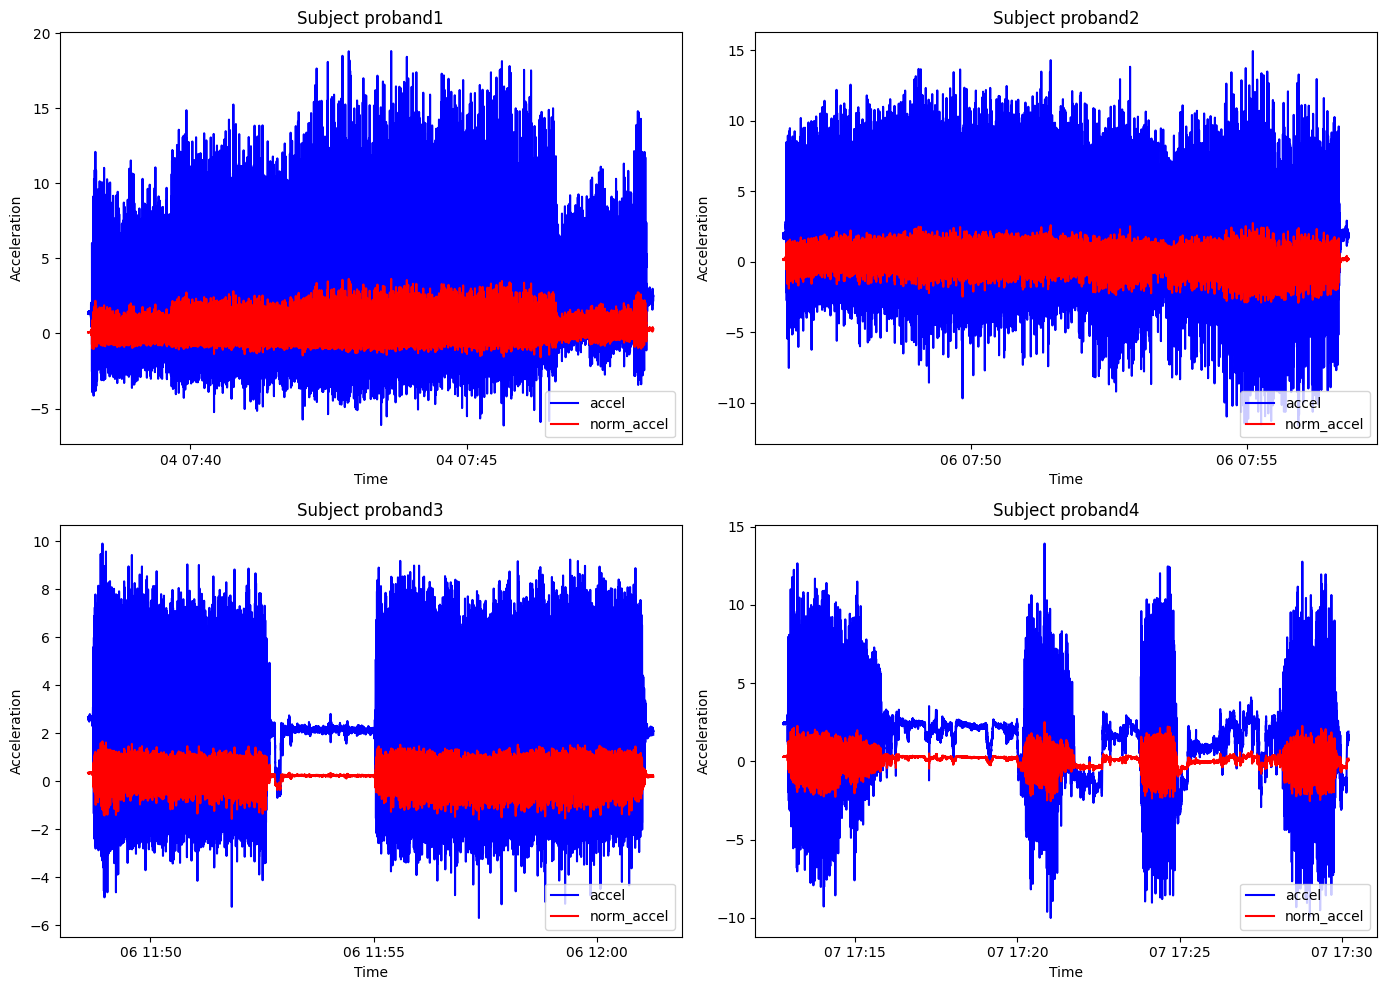

In [ ]:
chest_run = data[(data['Body_part']=='chest')&(data['Activity']=='running')]
chest_run = chest_run.drop(['Activity', 'Body_part'], axis=1)


chest_run_norm = chest_run.copy(deep=True) #c нормализацией
scaler = StandardScaler()
chest_run_norm[['attr_x','attr_y', 'attr_z']] = scaler.fit_transform(chest_run_norm[['attr_x','attr_y', 'attr_z']])


def norm_axis(df):
  for subject in data['Subject'].unique():
      subject_data = df[df['Subject'] == subject]
      subject_data['avg_accel'] = np.average(subject_data[['attr_x', 'attr_y', 'attr_z']], axis=1, weights=[0.5, 0.2, 0.3])
      df.loc[df['Subject'] == subject, 'avg_accel'] = subject_data['avg_accel']

  return df[['Subject','datetime','avg_accel']]



chest_run = norm_axis(chest_run)


chest_run_norm = norm_axis(chest_run_norm)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, subject in enumerate(data['Subject'].unique()[:4]):
    subject_data = chest_run[chest_run['Subject']==subject]
    subject_data2 = chest_run_norm[chest_run_norm['Subject']==subject]

    axes[i].plot(subject_data['datetime'], subject_data['avg_accel'], color='blue', label='accel')
    axes[i].plot(subject_data2['datetime'], subject_data2['avg_accel'], color='red', label='norm_accel')

    axes[i].legend(loc='lower right')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')
    axes[i].set_title(f'Subject {subject}')

plt.tight_layout()
plt.show()



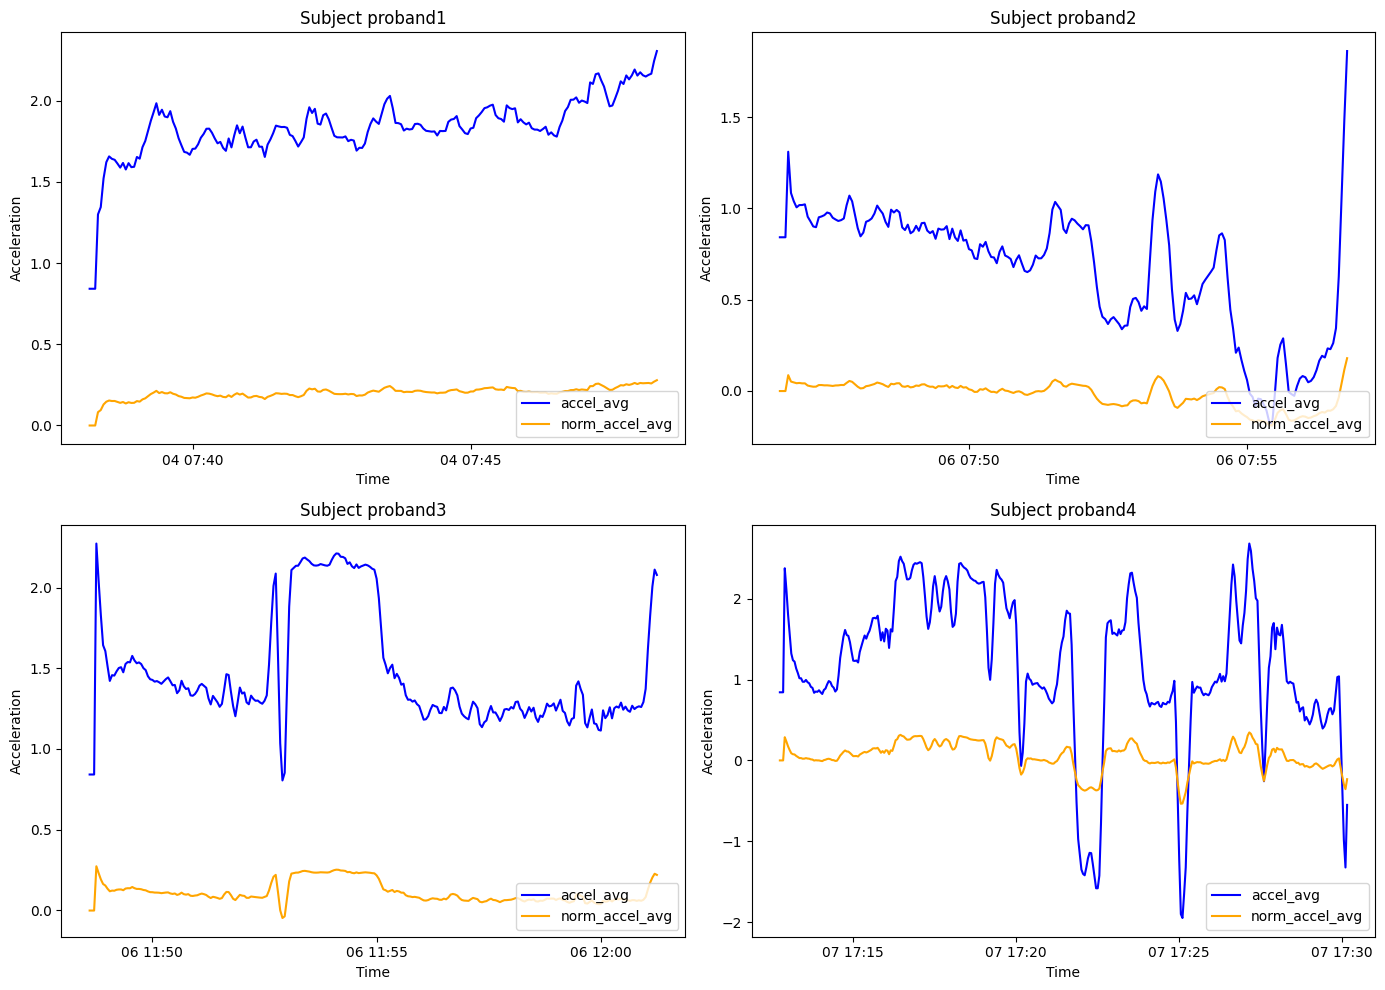

In [ ]:
chest_run = chest_run.groupby('Subject').resample('3S', on='datetime').mean()
chest_run['avg_accel_avg'] = chest_run.groupby('Subject')['avg_accel'].rolling(4).mean().values
chest_run['avg_accel_avg'].fillna(chest_run['avg_accel_avg'].mean(), inplace=True)

# с нормализацией
chest_run_norm = chest_run_norm.groupby('Subject').resample('3S', on='datetime').mean()
chest_run_norm['avg_accel_avg'] = chest_run_norm.groupby('Subject')['avg_accel'].rolling(4).mean().values
chest_run_norm['avg_accel_avg'].fillna(chest_run_norm['avg_accel_avg'].mean(), inplace=True)



fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, subject in enumerate(data['Subject'].unique()[:4]):
    subject_data = chest_run.loc[subject]
    subject_data2 = chest_run_norm.loc[subject]

    axes[i].plot(subject_data.index, subject_data['avg_accel_avg'], color='blue', label='accel_avg')
    axes[i].plot(subject_data2.index, subject_data2['avg_accel_avg'], color='orange', label='norm_accel_avg')

    axes[i].legend(loc='lower right')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')
    axes[i].set_title(f'Subject {subject}')

plt.tight_layout()
plt.show()

### Head

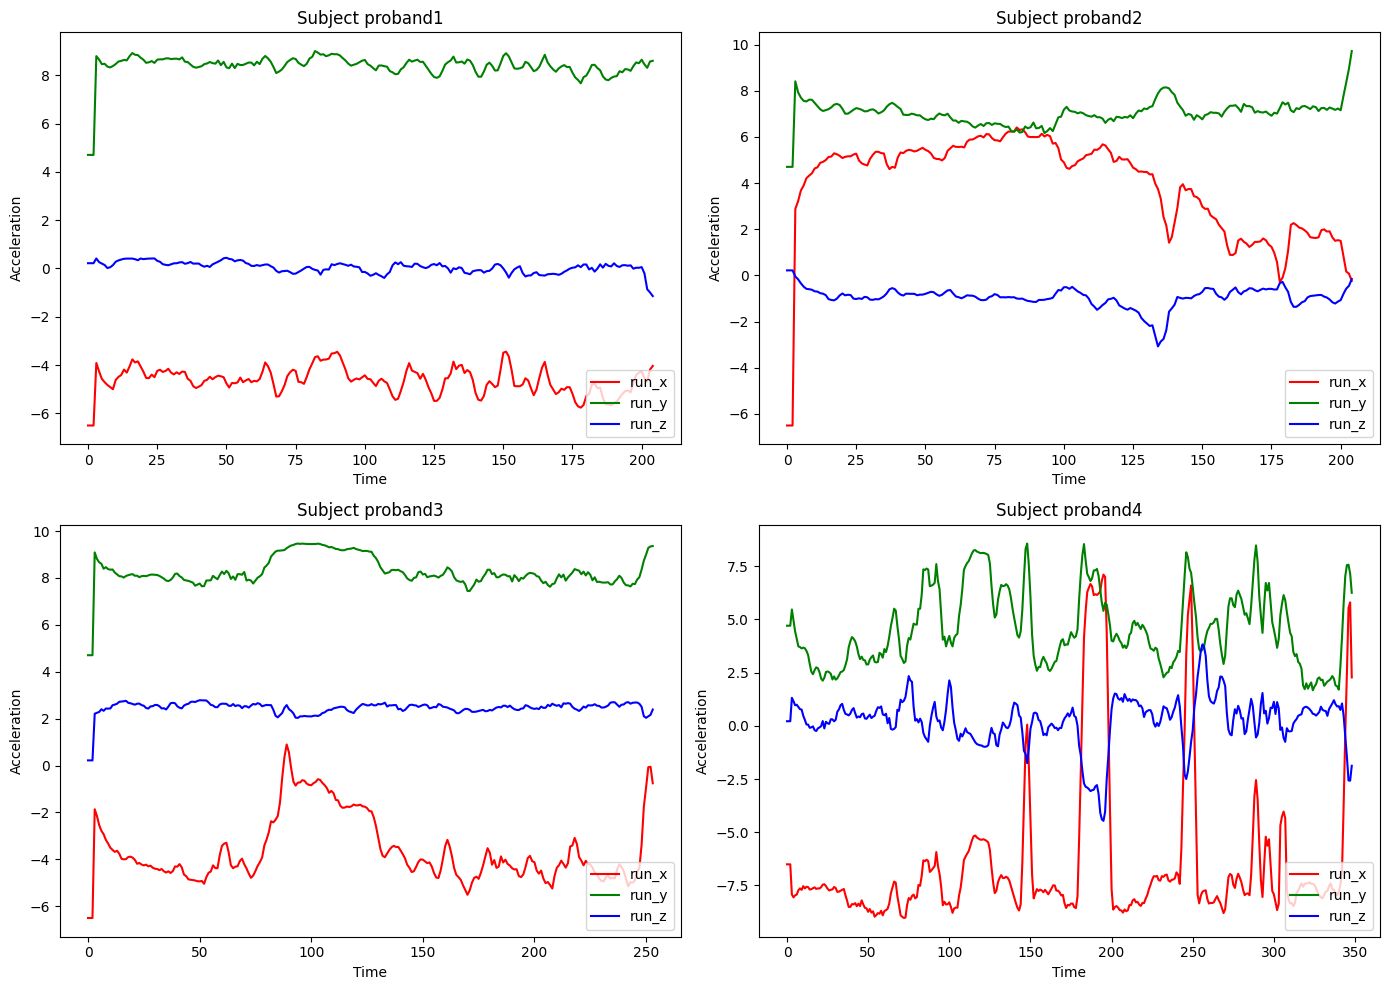

In [ ]:
data = base_data.copy(deep=True)

run = data[(data['Body_part']=='head')&(data['Activity']=='running')]
run_roll = rollaverage(run, 4, '3S')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, subject in enumerate(data['Subject'].unique()[:4]):
    subject_data = run_roll.loc[subject]
    subject_data.index = range(len(subject_data.index))

    axes[i].plot(subject_data.index, subject_data['attr_x_avg'], color='red', label='run_x')
    axes[i].plot(subject_data.index, subject_data['attr_y_avg'], color='green', label='run_y')
    axes[i].plot(subject_data.index, subject_data['attr_z_avg'], color='blue', label='run_z')

    axes[i].legend(loc='lower right')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')
    axes[i].set_title(f'Subject {subject}')

plt.tight_layout()
plt.show()

## Ядерное сглаживание

In [ ]:
df = base_data[(base_data['Body_part']=='chest')&(base_data['Subject']=='proband4')&(base_data['Activity']=='running')]
df = df.drop('Body_part', axis=1)
df.set_index('datetime', inplace=True)
df

,attr_x,attr_y,attr_z,Subject,Activity
datetime,,,,,
2015-07-07 17:12:47.414,0.531513,9.629479,0.706290,proband4,running
2015-07-07 17:12:47.430,0.569221,9.606135,0.830788,proband4,running
2015-07-07 17:12:47.450,0.520140,9.681553,0.802656,proband4,running
2015-07-07 17:12:47.472,0.521936,9.665991,0.817620,proband4,running
2015-07-07 17:12:47.494,0.492607,9.714474,0.820613,proband4,running
...,...,...,...,...,...
2015-07-07 17:30:11.917,0.732027,8.873510,-2.538452,proband4,running
2015-07-07 17:30:11.936,0.636259,9.113529,-2.626439,proband4,running
2015-07-07 17:30:11.955,0.903213,9.378088,-3.271078,proband4,running


Иллюстрация

[Text(0.5, 1.0, 'KDE plot running proband4')]

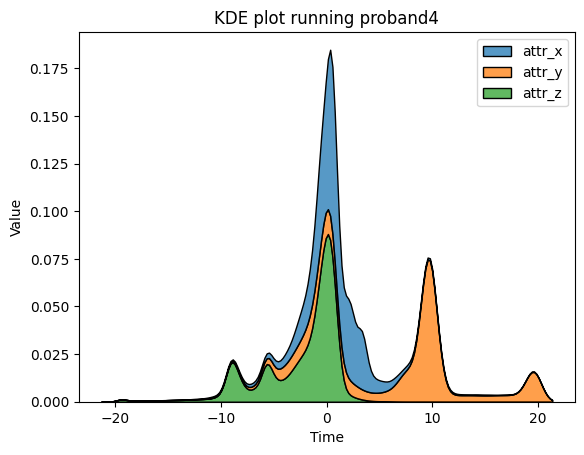

In [ ]:
kde = sns.kdeplot(data=df[['attr_x','attr_y','attr_z']], multiple="stack")


kde.set(xlabel='Time', ylabel='Value')
kde.set(title=f'KDE plot running proband4')

## Экспоненциальное сглаживание

In [ ]:
def ewmaverage(data, alpha, time):

  data = data.groupby('Subject').resample(time, on='datetime').mean()

    # применение экспоненциального сглаживания к временному ряду
  data['exp_smooth_x'] = data['attr_x'].ewm(alpha=alpha).mean()
  data['exp_smooth_y'] = data['attr_y'].ewm(alpha=alpha).mean()
  data['exp_smooth_z'] = data['attr_z'].ewm(alpha=alpha).mean()

  data['exp_smooth_x'].fillna(data['exp_smooth_x'].mean(), inplace=True)
  data['exp_smooth_y'].fillna(data['exp_smooth_y'].mean(), inplace=True)
  data['exp_smooth_z'].fillna(data['exp_smooth_z'].mean(), inplace=True)

  return data

Head. Сравнение скользящего среднего и экспоненциального сглаживания

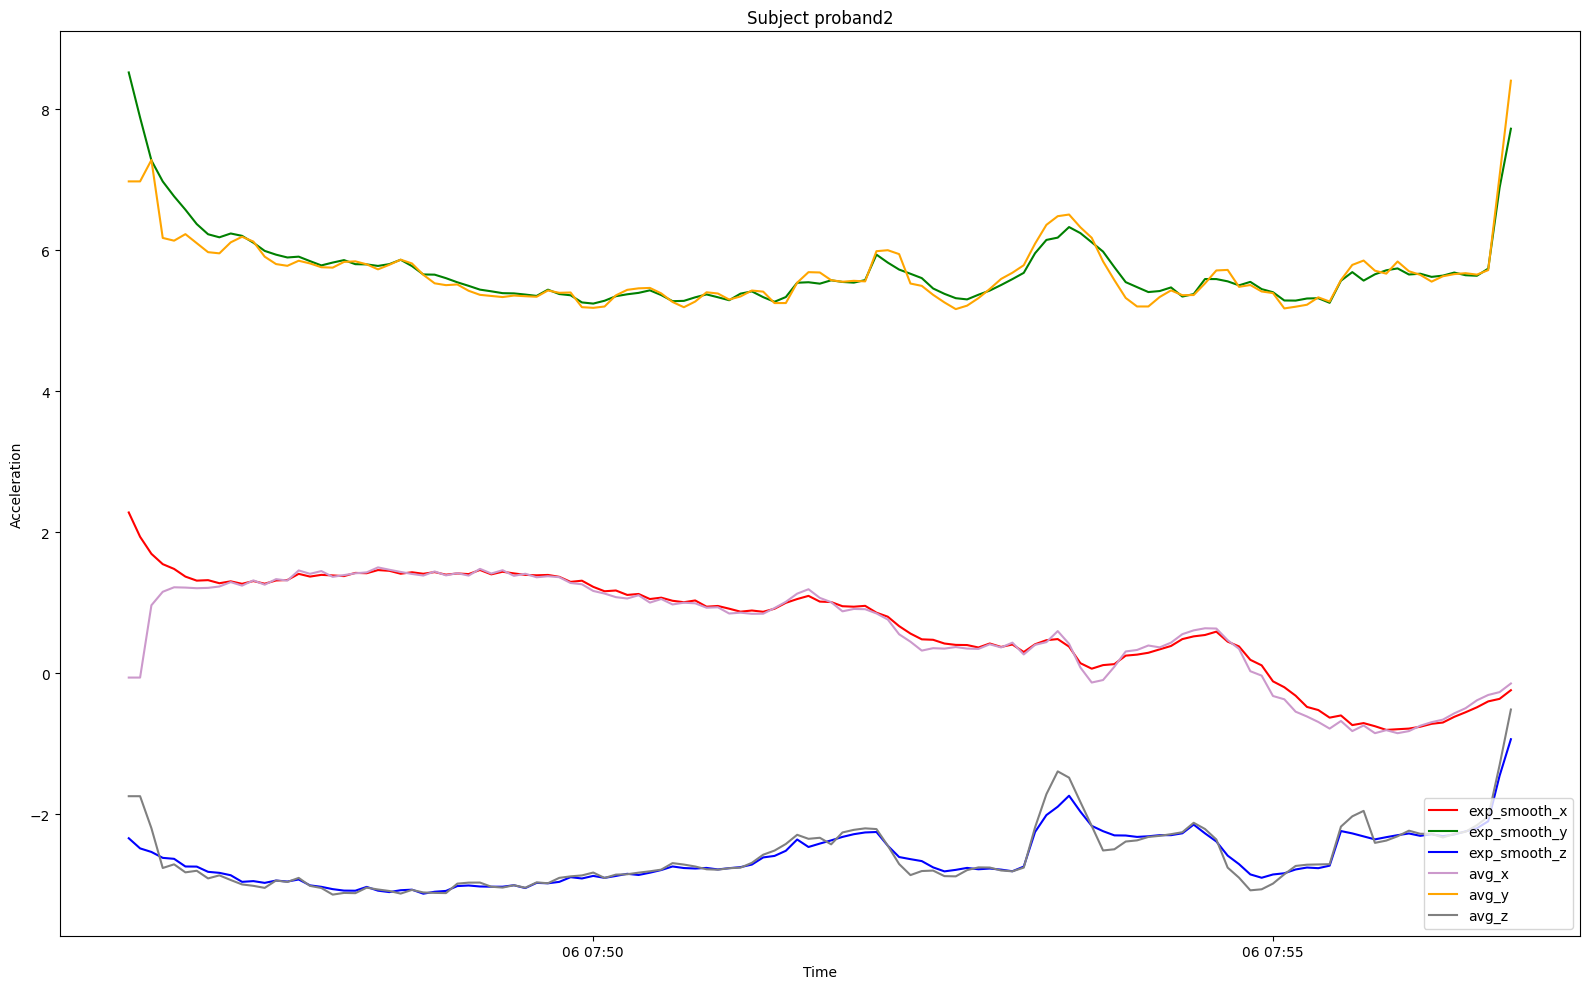

In [ ]:
data = base_data.copy(deep=True)

run = data[(data['Body_part']=='chest')&(data['Activity']=='running')]
run_ewm = ewmaverage(run, 0.3, '5S')
run_roll = rollaverage(run, 3, '5S')

fig, axes = plt.subplots(figsize=(16, 10))

subject_data = run_ewm.loc['proband2']


axes.plot(subject_data.index, subject_data['exp_smooth_x'], color='red', label='exp_smooth_x')
axes.plot(subject_data.index, subject_data['exp_smooth_y'], color='green', label='exp_smooth_y')
axes.plot(subject_data.index, subject_data['exp_smooth_z'], color='blue', label='exp_smooth_z')

subject_data = run_roll.loc['proband2']
axes.plot(subject_data.index, subject_data['attr_x_avg'], color='#CC99CC', label='avg_x')
axes.plot(subject_data.index, subject_data['attr_y_avg'], color='orange', label='avg_y')
axes.plot(subject_data.index, subject_data['attr_z_avg'], color='gray', label='avg_z')

axes.legend(loc='lower right')
axes.set_xlabel('Time')
axes.set_ylabel('Acceleration')
axes.set_title(f'Subject proband2')

plt.tight_layout()
plt.show()


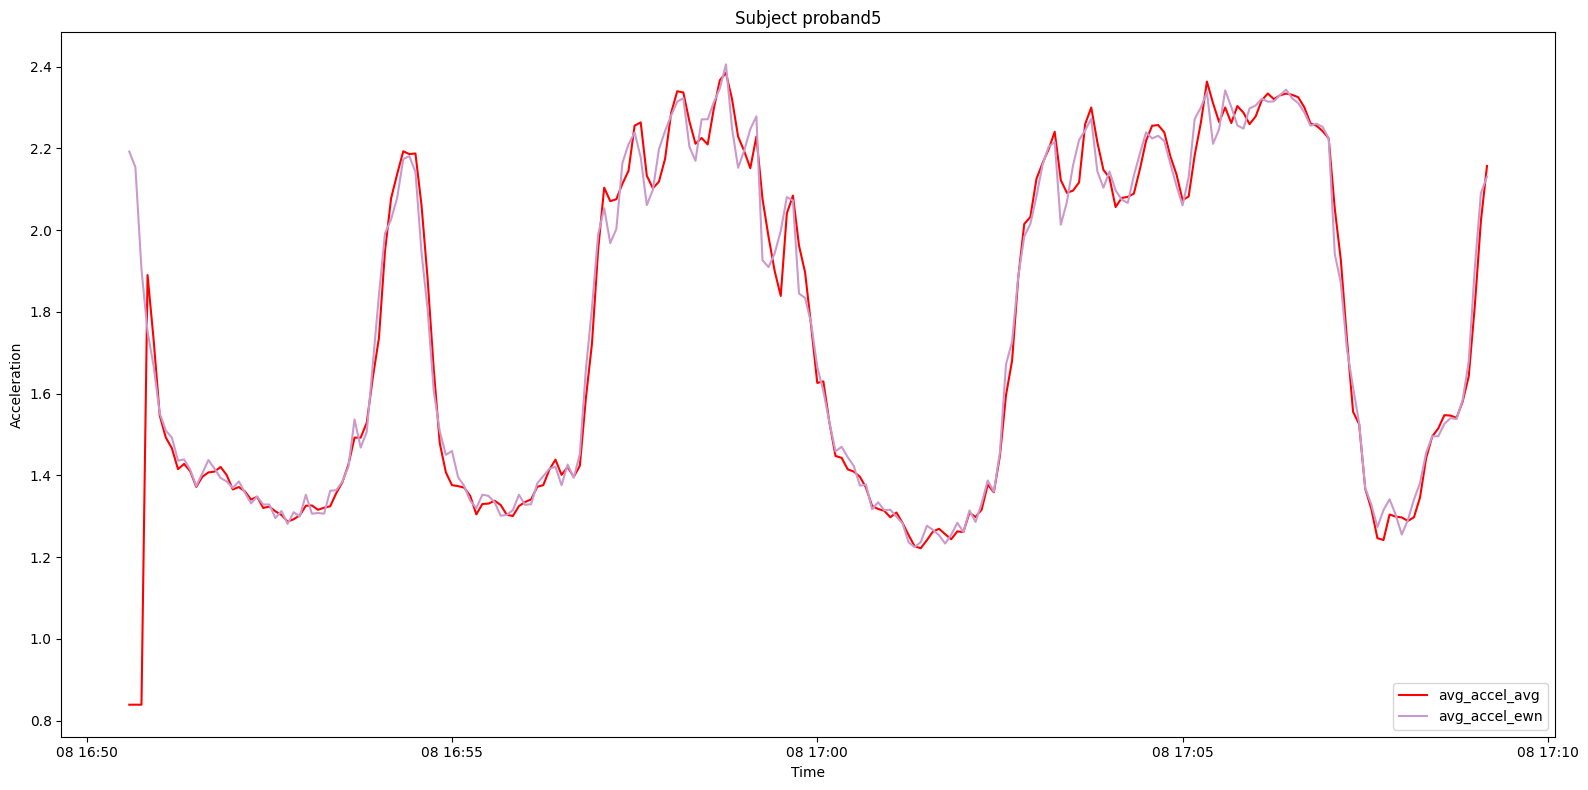

In [ ]:
chest_run = data[(data['Body_part']=='chest')&(data['Activity']=='running')]
chest_run = chest_run.drop(['Activity', 'Body_part'], axis=1)


def norm_axis(df):
  for subject in data['Subject'].unique():
      subject_data = df[df['Subject'] == subject]
      subject_data['avg_accel'] = np.average(subject_data[['attr_x', 'attr_y', 'attr_z']], axis=1, weights=[0.5, 0.2, 0.3])
      df.loc[df['Subject'] == subject, 'avg_accel'] = subject_data['avg_accel']

  return df[['Subject','datetime','avg_accel']]

alpha = 0.4
window = 4

chest_run = norm_axis(chest_run)
chest_run_avg = chest_run.groupby('Subject').resample('5S', on='datetime').mean()
chest_run_avg['avg_accel_avg'] = chest_run_avg.groupby('Subject')['avg_accel'].rolling(window).mean().values
chest_run_avg['avg_accel_avg'].fillna(chest_run_avg['avg_accel_avg'].mean(), inplace=True)

chest_run_ewn = chest_run.groupby('Subject').resample('5S', on='datetime').mean()
chest_run_ewn['avg_accel_ewn'] = chest_run_ewn.groupby('Subject')['avg_accel'].ewm(alpha=alpha).mean().values
chest_run_ewn['avg_accel_ewn'].fillna(chest_run_ewn['avg_accel_ewn'].mean(), inplace=True)


fig, axes = plt.subplots(figsize=(16, 8))

subject_data = chest_run_avg.loc['proband5']


axes.plot(subject_data.index, subject_data['avg_accel_avg'], color='red', label='avg_accel_avg')


subject_data2 = chest_run_ewn.loc['proband5']
axes.plot(subject_data2.index, subject_data2['avg_accel_ewn'], color='#CC99CC', label='avg_accel_ewn')


axes.legend(loc='lower right')
axes.set_xlabel('Time')
axes.set_ylabel('Acceleration')
axes.set_title(f'Subject proband5')

plt.tight_layout()
plt.show()

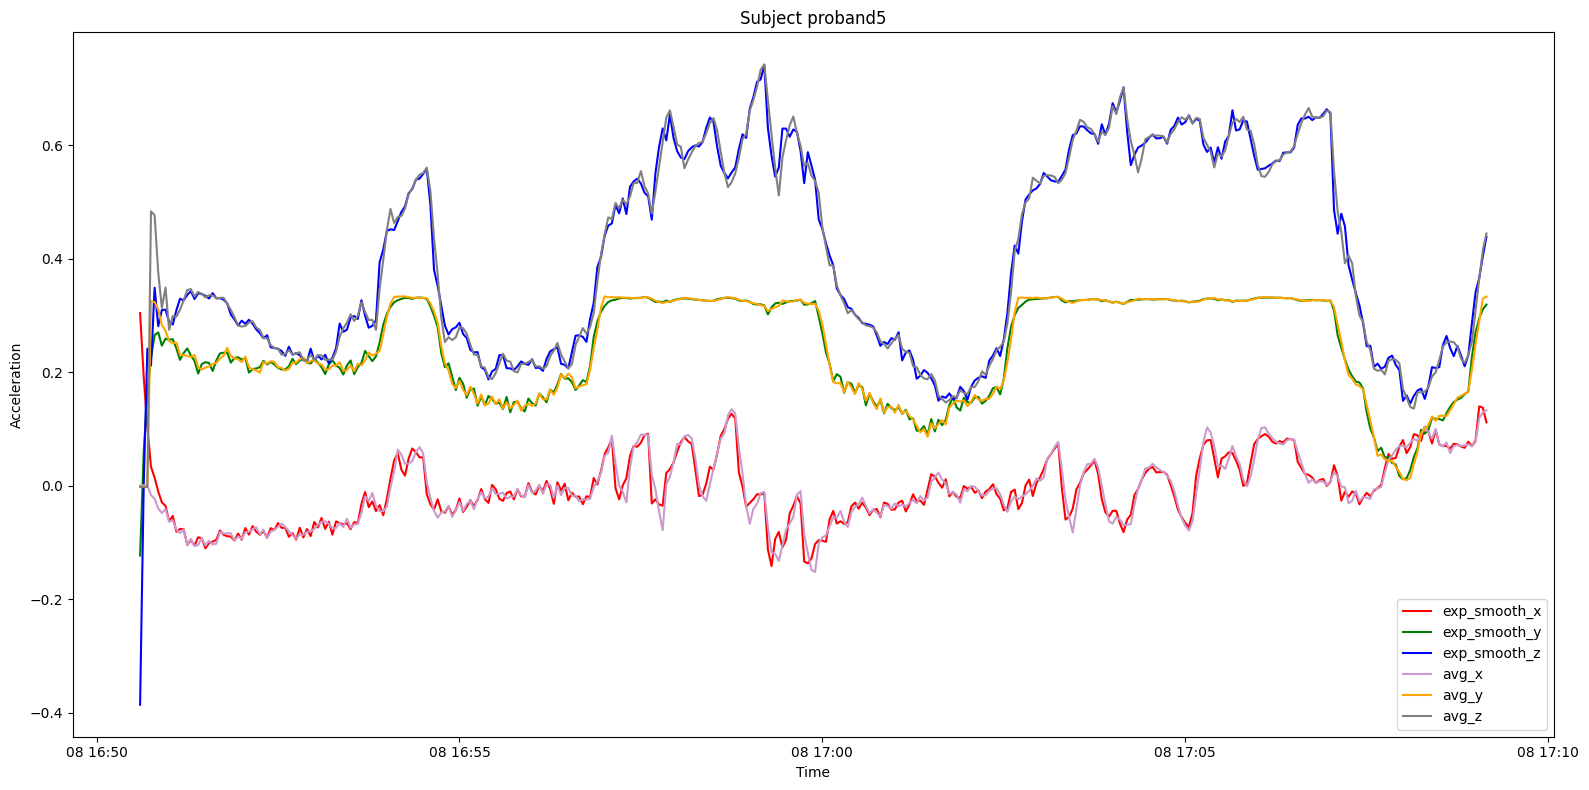

In [ ]:
head_run_norm = run.copy(deep=True) #c нормализацией
scaler = StandardScaler()
head_run_norm[['attr_x','attr_y', 'attr_z']] = scaler.fit_transform(head_run_norm[['attr_x','attr_y', 'attr_z']])

run_ewm_norm = ewmaverage(head_run_norm, 0.4, '3S')
run_roll_norm = rollaverage(head_run_norm, 4, '3S')


fig, axes = plt.subplots(figsize=(16, 8))

subject_data = run_ewm_norm.loc['proband5']


axes.plot(subject_data.index, subject_data['exp_smooth_x'], color='red', label='exp_smooth_x')
axes.plot(subject_data.index, subject_data['exp_smooth_y'], color='green', label='exp_smooth_y')
axes.plot(subject_data.index, subject_data['exp_smooth_z'], color='blue', label='exp_smooth_z')

subject_data = run_roll_norm.loc['proband5']
axes.plot(subject_data.index, subject_data['attr_x_avg'], color='#CC99CC', label='avg_x')
axes.plot(subject_data.index, subject_data['attr_y_avg'], color='orange', label='avg_y')
axes.plot(subject_data.index, subject_data['attr_z_avg'], color='gray', label='avg_z')

axes.legend(loc='lower right')
axes.set_xlabel('Time')
axes.set_ylabel('Acceleration')
axes.set_title(f'Subject proband5')

plt.tight_layout()
plt.show()

# **Группировка нужных даннных для кластеризации и поиска разницы двух активностей**

бег и ходьба

In [ ]:
new_data = base_data.copy(deep=True)
# с головы
run_head = new_data[(new_data['Activity']=='running')&(new_data['Body_part']=='head')]
walk_head = new_data[(new_data['Activity']=='walking')&(new_data['Body_part']=='head')]

run_head = rollaverage(run_head,  4, '3S')
walk_head = rollaverage(walk_head,  4, '3S')

# с груди
run_chest = new_data[(new_data['Activity']=='running')&(new_data['Body_part']=='chest')]
walk_chest = new_data[(new_data['Activity']=='walking')&(new_data['Body_part']=='chest')]

run_chest = rollaverage(run_chest,  4, '3S')
walk_chest = rollaverage(walk_chest,  4, '3S')

***Сохраним в фрейм для кластеризации***

In [ ]:
run_walk = pd.DataFrame()

walk_chest['Activity'] = 'walking'
walk_head['Activity'] = 'walking'
run_chest['Activity'] = 'running'
run_head['Activity'] = 'running'

run_chest['Body_part'] = 'chest'
run_head['Body_part'] = 'head'
walk_chest['Body_part'] = 'chest'
walk_head['Body_part'] = 'head'

run_walk = pd.concat([run_walk, run_chest])
run_walk = pd.concat([run_walk, run_head])

run_walk = pd.concat([run_walk, walk_chest])
run_walk = pd.concat([run_walk, walk_head])

In [ ]:
run_walk[['Body_part']].value_counts()

Body_part
chest        6857
head         6857
dtype: int64

In [ ]:
run_walk.to_csv('/content/drive/MyDrive/Colab Notebooks/Диплом/run_walk.csv')

Просто посмотреть как выглядит

In [ ]:
run1 = run_walk.loc['proband1']
run1 = run1[run1['Activity']=='running']
run1.index = range(len(run1)) # т.к. время разное, "обобщим на общий график"

walk1 = run_walk.loc['proband1']
walk1 = walk1[walk1['Activity']=='walking']
walk1.index = range(len(walk1))

In [ ]:
walk1[walk1['Body_part']=='head']

,attr_x,attr_y,attr_z,attr_x_avg,attr_y_avg,attr_z_avg,Activity,Body_part
214,-2.806566,9.351626,0.012976,-6.112296,6.039581,0.123612,walking,head
215,-2.631521,9.286650,0.380602,-6.112296,6.039581,0.123612,walking,head
216,0.234257,9.599109,0.556189,-6.112296,6.039581,0.123612,walking,head
217,2.697096,9.316565,-0.031145,-0.626684,9.388488,0.229656,walking,head
218,1.625304,9.597082,0.157307,0.481284,9.449851,0.265738,walking,head
...,...,...,...,...,...,...,...,...
423,-5.548112,7.889214,0.774855,-5.950699,7.623642,0.426396,walking,head
424,-4.623786,8.518350,0.396520,-5.628526,7.812982,0.622197,walking,head
425,-1.320187,9.555423,0.979480,-4.404477,8.328477,0.770964,walking,head
426,-0.145392,9.774720,0.253574,-2.909369,8.934427,0.601107,walking,head


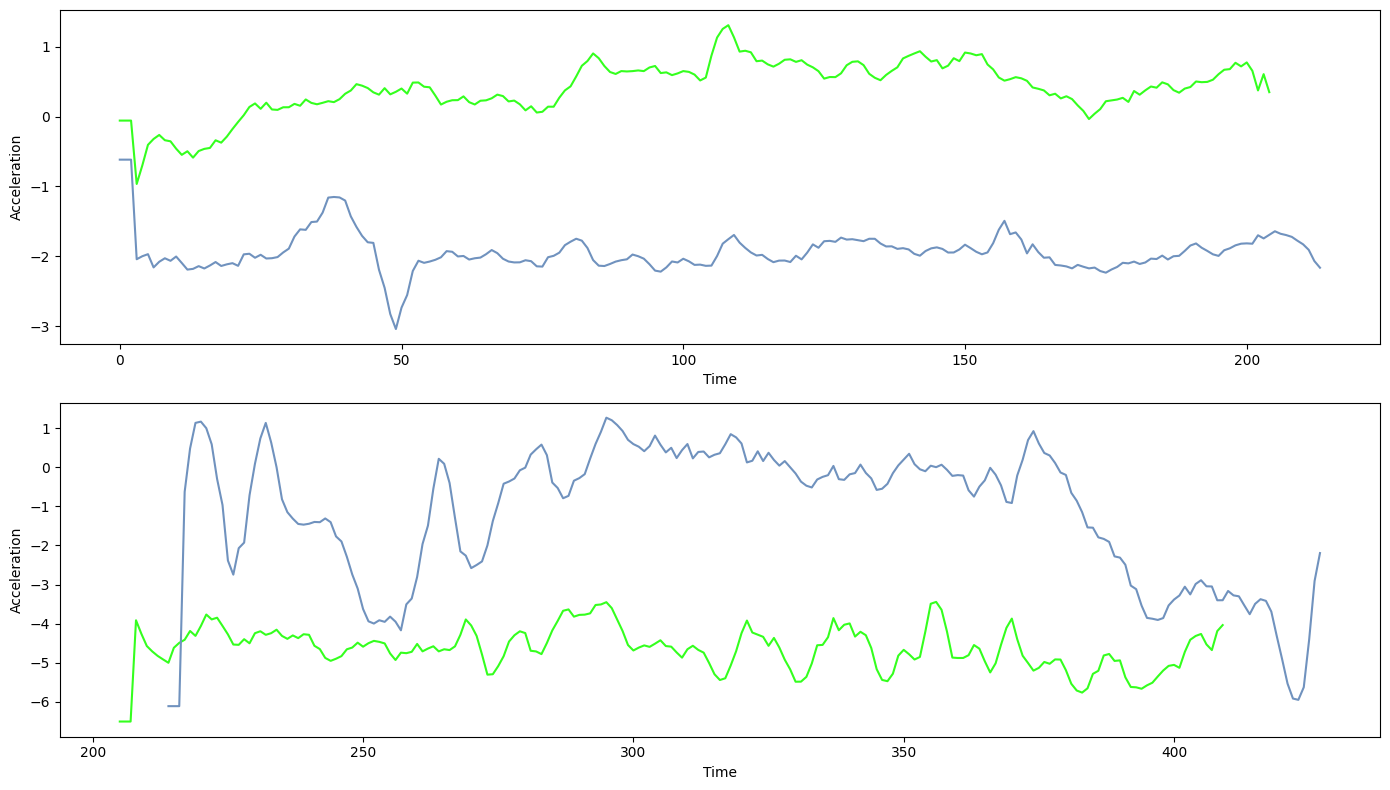

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(14, 8))

for i, body in enumerate(['chest', 'head']):
  r = run1[run1['Body_part']==body]
  w = walk1[walk1['Body_part']==body]

  axes[i].plot(r['attr_x_avg'], color='#34FF1E', label='run_x')
  axes[i].plot(w['attr_x_avg'], color='#7092BE', label='walk_x')

  # axes[i].legend(loc='lower right')
  axes[i].set_xlabel('Time')
  axes[i].set_ylabel('Acceleration')

plt.tight_layout()
plt.show()

# **Алгоритм Pelt**

In [ ]:
### нарисуем пока для первого человека

In [ ]:
!pip install ruptures
import ruptures as rpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00


# Вариант

In [ ]:
data = base_data.copy(deep=True)

In [ ]:
chest_run = data[(data['Body_part']=='chest')&(data['Activity']=='running')]
chest_run = chest_run.drop(['Activity', 'Body_part'], axis=1)
chest_run = rollaverage(chest_run, 2, '10S')

In [ ]:
chest_run

attr_x    attr_y    attr_z  attr_x_avg  \
Subject  datetime                                                        
proband1 2015-07-04 07:38:00 -1.422096  9.547550  0.599089   -0.067750   
         2015-07-04 07:38:10 -0.957981  8.330840  0.214312   -1.190039   
         2015-07-04 07:38:20 -0.305136  8.645457  0.205480   -0.631559   
         2015-07-04 07:38:30 -0.438842  8.637019  0.368411   -0.371989   
         2015-07-04 07:38:40 -0.560138  8.806092  0.402063   -0.499490   
...                                ...       ...       ...         ...   
proband9 2015-07-11 13:41:30 -1.677307  7.218002 -2.162480   -1.178784   
         2015-07-11 13:41:40  0.204623  7.319006 -1.969612   -0.736342   
         2015-07-11 13:41:50  0.702422  9.295771  0.200502    0.453522   
         2015-07-11 13:42:00  1.431074  9.540401  1.276623    1.066748   
         2015-07-11 13:42:10  0.999320  9.640395  0.853285    1.215197   

                              attr_y_avg  attr_z_avg  
Subject  datetime                                     
proband1 2015-07-04 07:38:00    6.994844   -1.728488  
         2015-07-04 07:38:10    8.939195    0.406701  
         2015-07-04 07:38:20    8.488149    0.209896  
         2015-07-04 07:38:30    8.641238    0.286946  
         2015-07-04 07:38:40    8.721556    0.385237  
...                                  ...         ...  
proband9 2015-07-11 13:41:30    7.327209   -2.039335  
         2015-07-11 13:41:40    7.268504   -2.066046  
         2015-07-11 13:41:50    8.307388   -0.884555  
         2015-07-11 13:42:00    9.418086    0.738563  
         2015-07-11 13:42:10    9.590398    1.064954  

[1097 rows x 6 columns]

In [ ]:
X = chest_run.loc['proband1'][['attr_x_avg', 'attr_y_avg', 'attr_z_avg']]
X

,attr_x_avg,attr_y_avg,attr_z_avg
datetime,,,
2015-07-04 07:38:00,-0.067750,6.994844,-1.728488
2015-07-04 07:38:10,-1.190039,8.939195,0.406701
2015-07-04 07:38:20,-0.631559,8.488149,0.209896
2015-07-04 07:38:30,-0.371989,8.641238,0.286946
2015-07-04 07:38:40,-0.499490,8.721556,0.385237
...,...,...,...
2015-07-04 07:47:40,0.422981,8.677153,0.422742
2015-07-04 07:47:50,0.603021,8.787229,0.351891
2015-07-04 07:48:00,0.732205,8.588771,0.257095


signal - это матрица данных,
result - это список индексов, где происходят изменения.

Функция rpt.display() используется для визуализации данных и точек изменения.


In [ ]:
signal = np.array(X)

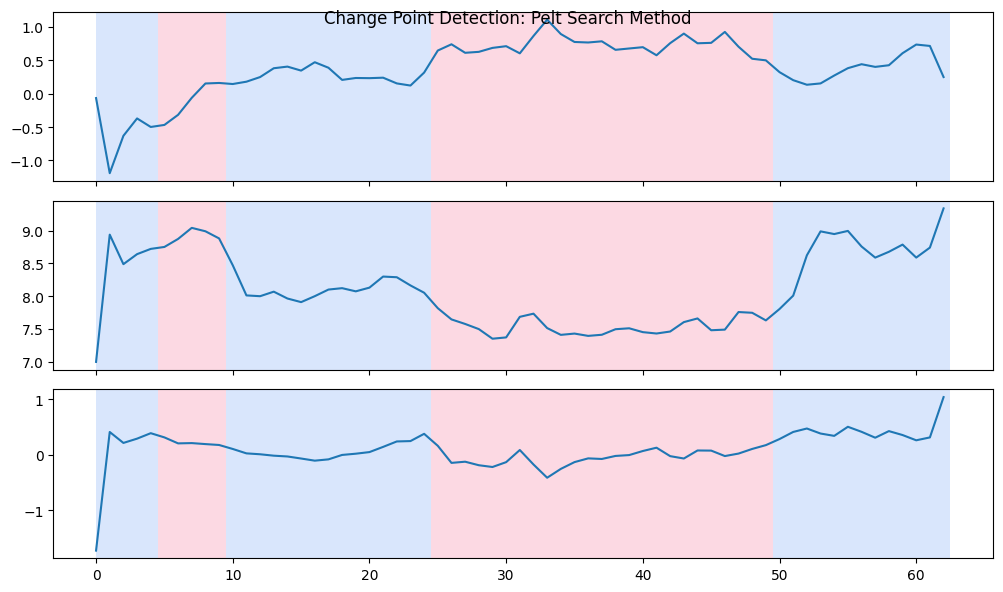

In [ ]:
# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=1)

# display
fig, axs = rpt.display(signal, result)
fig.suptitle('Change Point Detection: Pelt Search Method', fontsize=12)
plt.show()

In [ ]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"
algo = rpt.Binseg(model = model, custom_cost=rpt.costs.CostL2).fit(signal) #функции затрат. Здесь c(y) = Σt (yt - y¯)2
my_bkps = algo.predict(n_bkps=20)
# show results
fig, axs = rpt.display(signal, my_bkps, figsize=(10, 6))
fig.suptitle('Change Point Detection: Binary Segmentation Search Method', fontsize=12)
plt.show()

In [ ]:
#Changepoint detection with window-based search method
model = "l2"
algo = rpt.Window(width=10, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=20)

fig, axs = rpt.display(signal, my_bkps)
fig.suptitle('Change Point Detection: Window-Based Search Method', fontsize=12)
plt.show()

In [ ]:
#Changepoint detection with dynamic programming search method
model = "l1"
algo = rpt.Dynp(model=model, min_size=1, jump=2).fit(signal)
my_bkps = algo.predict(n_bkps=20)


fig, axs = rpt.display(signal, my_bkps, figsize=(10, 6))
fig.suptitle('Change Point Detection: Dynamic Programming Search Method', fontsize=12)
plt.show()

В отличие от rpt.Pelt, который реализует алгоритм с помощью аппроксимации минимальной стоимости разрезания, rpt.Dynp реализует алгоритм с помощью динамического программирования.

# Пример


In [ ]:
X = chest_run.loc['proband4'][['attr_x_avg', 'attr_y_avg', 'attr_z_avg']]

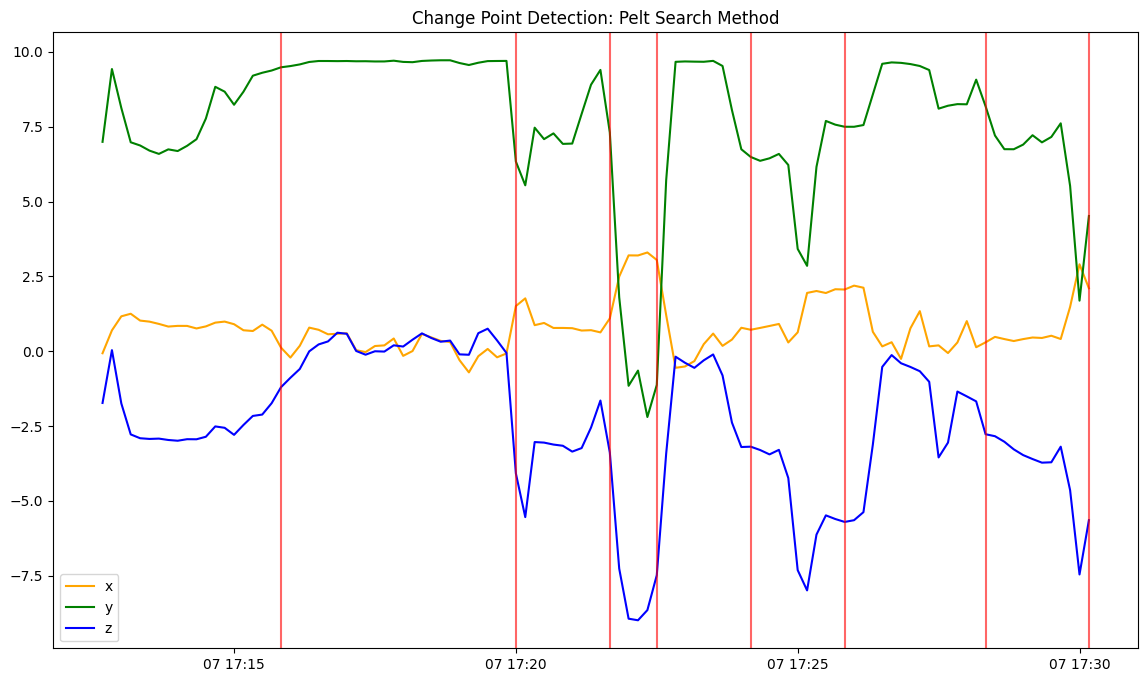

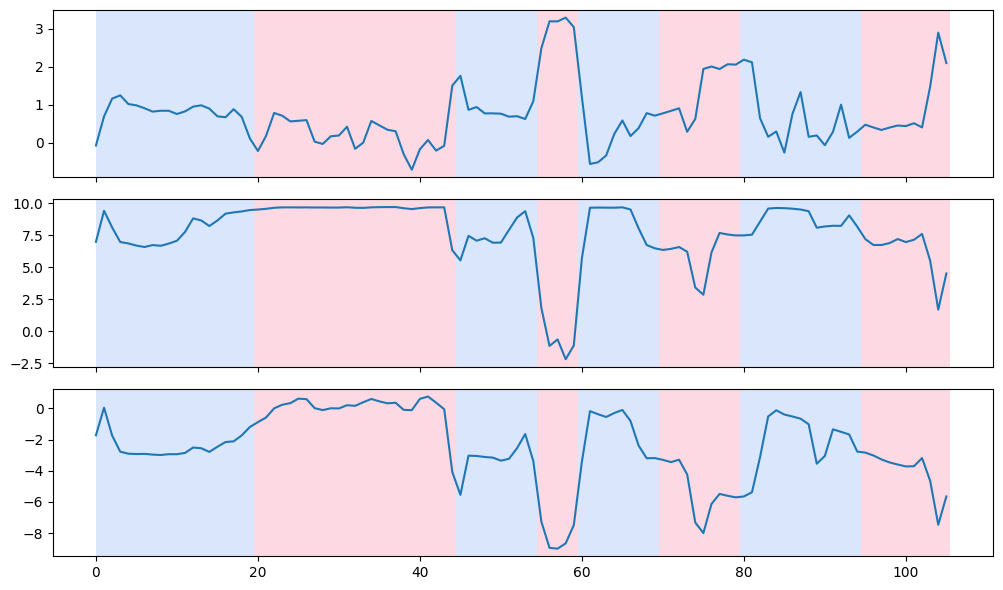

In [ ]:
# detection
algo = rpt.Pelt(model="rbf")
result = algo.fit_predict(X[['attr_x_avg','attr_y_avg','attr_z_avg']].values, pen=2)

segments = np.split(X, result[1:-1])
means = [np.mean(segment) for segment in segments]

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(X.index, X['attr_x_avg'], color='orange', label='x')
ax.plot(X.index, X['attr_y_avg'], color='green', label='y')
ax.plot(X.index, X['attr_z_avg'], color='blue', label='z')

for i in range(len(result)):
    plt.axvline(x=X.index[result[i]-1], color='red', alpha=0.6)

plt.title('Change Point Detection: Pelt Search Method')
plt.legend()
plt.show()


fig, axs = rpt.display(X[['attr_x_avg','attr_y_avg','attr_z_avg']].values, result)
plt.show()

In [ ]:
X.iloc[result[2]-1:result[3]-1]

In [ ]:
X

In [ ]:
# detection
algo = rpt.Binseg(model = model, custom_cost=rpt.costs.CostL2).fit(X[['attr_x_avg','attr_y_avg','attr_z_avg']].values) #функции затрат. Здесь c(y) = Σt (yt - y¯)2
result = algo.predict(n_bkps=20)

segments = np.split(X, result[1:-1])
means = [np.mean(segment) for segment in segments]

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(X.index, X['attr_x_avg'], color='orange', label='attr_x_avg')
ax.plot(X.index, X['attr_y_avg'], color='green', label='attr_y_avg')
ax.plot(X.index, X['attr_z_avg'], color='blue', label='attr_z_avg')

for i in result:
    plt.axvline(x=X.index[i-1], color='r',  alpha=0.3)


plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.plot()




In [ ]:
# detection
model = "l2"
algo = rpt.Window(width=10, model=model).fit(X[['attr_x_avg','attr_y_avg','attr_z_avg']].values)
result = algo.predict(n_bkps=20)

segments = np.split(X, result[1:-1])
means = [np.mean(segment) for segment in segments]

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(X.index, X['attr_x_avg'], color='orange', label='attr_x_avg')
ax.plot(X.index, X['attr_y_avg'], color='green', label='attr_y_avg')
ax.plot(X.index, X['attr_z_avg'], color='blue', label='attr_z_avg')

for i in result:
    plt.axvline(x=X.index[i-1], color='r',  alpha=0.3)


plt.title('Change Point Detection: Window-Based Search Method')
plt.plot()



In [ ]:
model = "l2"
algo = rpt.Dynp(model=model, min_size=1, jump=2).fit(X[['attr_x_avg','attr_y_avg','attr_z_avg']].values)
result = algo.predict(n_bkps=20)


segments = np.split(X, result[1:-1])
means = [np.mean(segment) for segment in segments]

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(X.index, X['attr_x_avg'], color='orange', label='attr_x_avg')
ax.plot(X.index, X['attr_y_avg'], color='green', label='attr_y_avg')
ax.plot(X.index, X['attr_z_avg'], color='blue', label='attr_z_avg')

for i in result:
    plt.axvline(x=X.index[i-1], color='r',  alpha=0.3)


plt.plot([])
plt.show()



In [ ]:
# c нормализацией

In [ ]:
chest_run_norm

In [ ]:
X = chest_run_norm.loc['proband1']['avg_accel_avg']
X

In [ ]:
model = "l2"
algo = rpt.Dynp(model=model, min_size=1, jump=2).fit(X.values)
result = algo.predict(n_bkps=20)


segments = np.split(X, result[1:-1])
means = [np.mean(segment) for segment in segments]

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(X.index, X.values, color='orange')


for i in result:
    plt.axvline(x=X.index[i-1], color='r',  alpha=0.3)


plt.plot([])
plt.show()